# Multiple Linear Regression

## 📌 What is Multiple Linear Regression?

Multiple Linear Regression models the relationship between a dependent variable $y$ and **two or more independent variables** ($x_1, x_2, \dots, x_p$).

- Equation:

$$
y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \dots + \beta_p x_{ip} + \epsilon_i
$$

- $\beta_0$ = intercept  
- $\beta_j$ = coefficient for predictor $x_j$  
- $\epsilon_i$ = error term  

Purpose: estimate how **each predictor affects $y$** while controlling for the others.


## 📌 Matrix Formulation

Multiple regression can be written compactly in **matrix notation**:

$$
\mathbf{y} = \mathbf{X} \boldsymbol{\beta} + \boldsymbol{\epsilon}
$$

Where:  
- $\mathbf{y}$ is an $n \times 1$ vector of outcomes  
- $\mathbf{X}$ is an $n \times (p+1)$ matrix of predictors (including a column of 1s for intercept)  
- $\boldsymbol{\beta}$ is a $(p+1) \times 1$ vector of coefficients  
- $\boldsymbol{\epsilon}$ is an $n \times 1$ vector of errors  

**OLS solution**:

$$
\hat{\boldsymbol{\beta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$


## 📌 Interpretation

- $\hat{\beta}_j$ represents the expected change in $y$ **for a one-unit increase in $x_j$**, holding all other variables constant.  
- Helps understand **individual predictor contributions**.  
- Assumptions: linearity, independence, homoscedasticity, normality of residuals.


In [1]:
# Example: Predict exam score using study hours and sleep hours
study_hours <- c(2, 4, 6, 8, 10, 12, 14)
sleep_hours <- c(6, 6.5, 7, 7.5, 8, 8.5, 9)
exam_scores <- c(50, 55, 65, 70, 80, 85, 90)

# Combine into data frame
multi_data <- data.frame(Study = study_hours, Sleep = sleep_hours, Score = exam_scores)

# Step 1: Fit multiple linear regression model
multi_model <- lm(Score ~ Study + Sleep, data = multi_data)

# Step 2: Print summary
summary(multi_model)

# Step 3: Predicted values
multi_data$Predicted <- predict(multi_model)
print("Predicted Scores:")
print(multi_data$Predicted)


Call:
lm(formula = Score ~ Study + Sleep, data = multi_data)

Residuals:
      1       2       3       4       5       6       7 
 0.1786 -1.7857  1.2500 -0.7143  2.3214  0.3571 -1.6071 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  42.8571     1.3832   30.98 6.57e-07 ***
Study         3.4821     0.1546   22.52 3.21e-06 ***
Sleep             NA         NA      NA       NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.637 on 5 degrees of freedom
Multiple R-squared:  0.9902,	Adjusted R-squared:  0.9883 
F-statistic:   507 on 1 and 5 DF,  p-value: 3.211e-06


[1] "Predicted Scores:"
[1] 49.82143 56.78571 63.75000 70.71429 77.67857 84.64286 91.60714


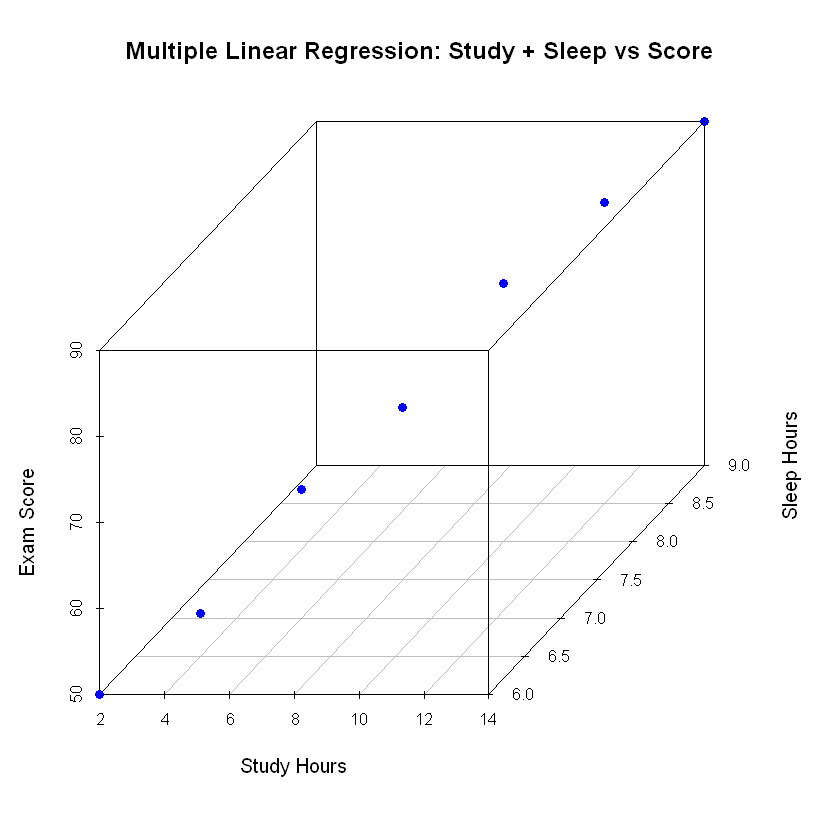

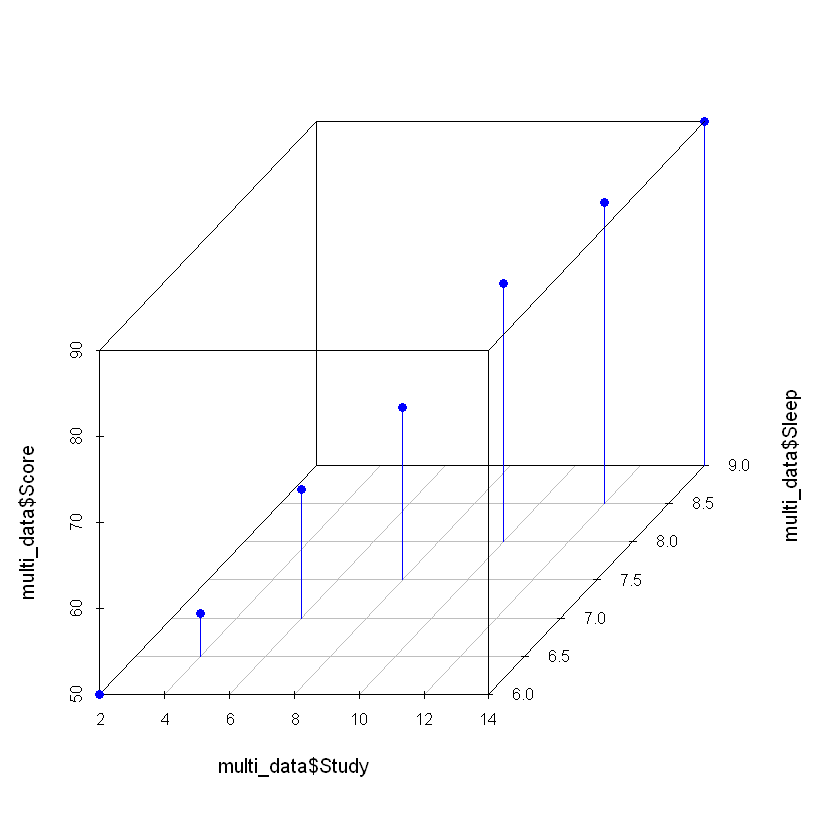

In [6]:
# 3D Visualization using scatterplot3d
if(!require(scatterplot3d)) install.packages("scatterplot3d", dependencies = TRUE)
library(scatterplot3d)

par(bg = "white", col.axis = "black", col.lab = "black", col.main = "black", pch = 19)
scatterplot3d(multi_data$Study, multi_data$Sleep, multi_data$Score,
              pch = 19, color = "blue",
              xlab = "Study Hours", ylab = "Sleep Hours", zlab = "Exam Score",
              main = "Multiple Linear Regression: Study + Sleep vs Score")

# Add regression plane
fit <- lm(Score ~ Study + Sleep, data = multi_data)
par(bg = "white", col.axis = "black", col.lab = "black", col.main = "black", pch = 19)
scatterplot3d(multi_data$Study, multi_data$Sleep, multi_data$Score, pch=19, color="blue", type="h")
# scatterplot3d does not natively add plane; we can plot predicted points instead

## 📌 Interpretation

- Each coefficient shows **the effect of that variable on exam score** while keeping the other variable constant.  
- For example:
  - $\hat{\beta}_\text{Study}$ → expected increase in score per extra study hour, holding sleep constant  
  - $\hat{\beta}_\text{Sleep}$ → expected increase in score per extra hour of sleep, holding study hours constant  
- The predicted values show **model estimates for each observation**.
